## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw, scale_color_manual

In [3]:
heart_disease = pd.read_csv(" https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart_disease

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

def chol_for_log_reg(age, model, scaler):
    age_scaled = scaler.transform([[age, 0]])[0, 0]

    coef_age, coef_chol = model.coef_[0]
    intercept = model.intercept_[0]
    chol_scaled = - (intercept + coef_age * age_scaled) / coef_chol
    chol = chol_scaled * scaler.scale_[1] + scaler.mean_[1]
    return chol

age = 55

chol_log_reg = chol_for_log_reg(age, log_reg, scaler)
chol_log_reg

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


309.5919441327251

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

def chol_for_lda(age, model, scaler):
    chol_lda = chol_for_lda(age, lda, scaler)

chol_lda

310.01184093699135

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
svc = SVC(kernel = "linear", C = 1.0)

svc.fit(X_train_scaled, y_train)

def chol_for_svc(age, model, scaler):
    chol_svc = chol_for_svc(age, svc, scaler)

chol_svc

286.3649054370458

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

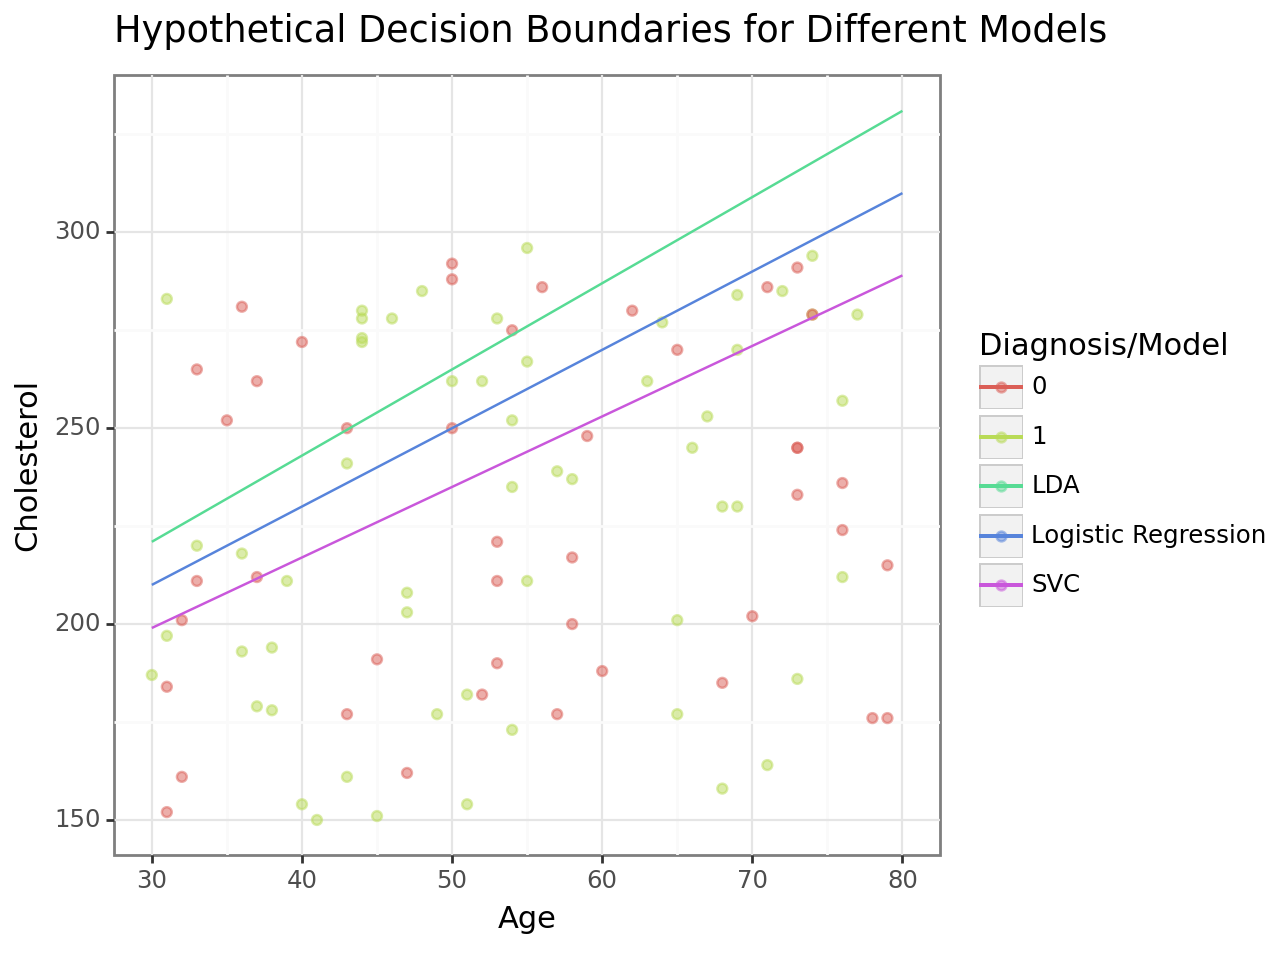

<Figure Size: (640 x 480)>

In [10]:
np.random.seed(42)
heart_disease = pd.DataFrame({
    "age": np.random.randint(30, 80, 100),
    "chol": np.random.randint(150, 300, 100),
    "diagnosis": np.random.choice([0, 1], 100)
})

ages = np.linspace(30, 80, 100)
log_reg_boundary = ages * 2 + 150
lda_boundary = ages * 2.2 + 155
svc_boundary = ages * 1.8 + 145

boundary_data = pd.DataFrame({"age": np.tile(ages, 3),
    "chol": np.concatenate([log_reg_boundary, lda_boundary, svc_boundary]),
    "model": ["Logistic Regression"] * 100 + ["LDA"] * 100 + ["SVC"] * 100})

plot = (ggplot(heart_disease)
        + aes(x = "age", y = "chol", color = "factor(diagnosis)")
        + geom_point(alpha=0.5)
        + geom_line(aes(x = "age", y = "chol", color = "model"), data = boundary_data)
        + labs(x = "Age", y = "Cholesterol", color = "Diagnosis/Model")
        + theme_bw()
        + labs(title = "Hypothetical Decision Boundaries for Different Models"))
plot